In [84]:
%load_ext autoreload 
%autoreload 2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.lines import Line2D
sz_ft = 15
sz_lb = 9
color_arr = ['indigo', 'royalblue', 'lightseagreen', 'darkgreen', 'goldenrod', 'darkred']
from cosmo import CosmoCalc
import cosmo
import sims
import tools
import lensing
import foregrounds as fg
import experiments as exp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
map_params = [600, 0.1, 600, 0.1]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster = [9e15, cosmo.concentration_parameter(1e15, 1, 0.674), 1]
cmb_unlensed = tools.make_gaussian_realization(map_params, l, cl)
kappa_map = lensing.NFW(cluster[0], cluster[1], cluster[2], 1100).convergence_map(map_params)
alpha_vec = lensing.deflection_from_convergence(map_params, kappa_map)
cmb_lensed = lensing.lens_map(map_params, cmb_unlensed, alpha_vec) 
dipole = cmb_lensed-cmb_unlensed

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


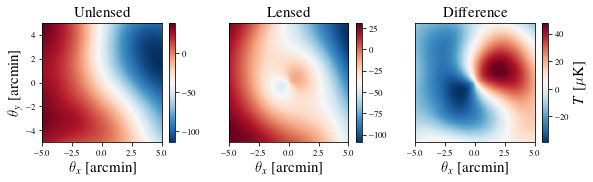

In [103]:
_, extent = tools.make_grid([100, 0.1, 100, 0.1])
fig, axarr = plt.subplots(1,3, figsize=(8.6,8.6))

im0 = axarr[0].imshow(cmb_unlensed[250:350, 250:350], extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(axarr[0])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb0 = fig.colorbar(im0, cax = cax)
cb0.ax.tick_params(labelsize=sz_lb)
axarr[0].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[0].set_title('Unlensed', fontsize = sz_ft)
axarr[0].tick_params(labelsize = sz_lb)

im1 = axarr[1].imshow(cmb_lensed[250:350, 250:350], extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(axarr[1])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb1 = fig.colorbar(im1, cax = cax)
cb1.ax.tick_params(labelsize=sz_lb)
axarr[1].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[1].set_title('Lensed', fontsize = sz_ft)
axarr[1].get_yaxis().set_visible(False)
axarr[1].tick_params(labelsize = sz_lb)


im2 = axarr[2].imshow(dipole[250:350, 250:350], extent = extent, cmap = cm.RdBu_r)
divider = make_axes_locatable(axarr[2])
cax = divider.append_axes("right", size="5%", pad=0.1)
cb2 = fig.colorbar(im2, cax = cax)
cb2.set_label(label = r'$T \ [\mu$'+'K]', size=sz_ft)
cb2.ax.tick_params(labelsize=sz_lb)
axarr[2].set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
axarr[2].set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
axarr[2].set_title('Difference', fontsize = sz_ft)
axarr[2].get_yaxis().set_visible(False)
axarr[2].tick_params(labelsize = sz_lb)

fig.tight_layout(pad=2)

fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/cmb_cluster_lensing.eps', dpi = 200, bbox_inches = 'tight')